In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [138]:
heart = pd.read_csv("C:/Users/Dell/Documents/imarticus/heart_failure_clinical_records_dataset.csv")

In [139]:
heart.isnull().sum()#null

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [140]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [141]:
heart.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [142]:
heart.tail(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [191]:
heart.shape 

(299, 13)

In [192]:
heart.describe()#statistical measures about the data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,424.214883,0.418060,38.083612,0.351171,259163.714883,1.234515,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,385.449328,0.494067,11.834841,0.478136,81478.304369,0.440098,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,76000.000000,0.500000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1280.250000,1.000000,80.000000,1.000000,440000.000000,2.150000,148.000000,1.000000,1.00000,285.000000,1.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x2a24bafb7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24bafbf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24bafb460>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24bb06670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24bb06a00>],
 'means': []}

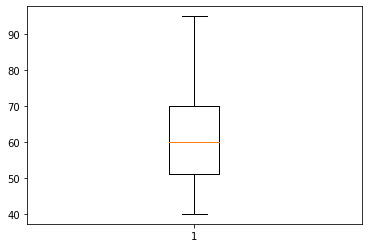

In [143]:
plt.boxplot(heart.age) #cont

{'whiskers': [<matplotlib.lines.Line2D at 0x2a24bb62850>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24bb62f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24bb62580>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24bb6f550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24bb6f8e0>],
 'means': []}

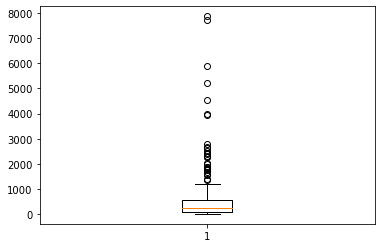

In [144]:
plt.boxplot(heart.creatinine_phosphokinase)#cont

In [145]:
q3 = heart.creatinine_phosphokinase.quantile(0.75)
q1 = heart.creatinine_phosphokinase.quantile(0.25)
iqr = q3-q1
iqr

465.5

In [146]:
ue = q3+1.5*(iqr)
print(ue)

1280.25


In [147]:
le = q1-1.5*(iqr)
print(le)

-581.75


In [148]:
heart[(heart.creatinine_phosphokinase<ue)&(heart.creatinine_phosphokinase>le)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [149]:
heart.creatinine_phosphokinase[heart.creatinine_phosphokinase>ue]=ue
heart.creatinine_phosphokinase[heart.creatinine_phosphokinase<le]=le

C:\Users\Dell\AppData\Local\Temp/ipykernel_20040/1179320261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart.creatinine_phosphokinase[heart.creatinine_phosphokinase>ue]=ue
C:\Users\Dell\AppData\Local\Temp/ipykernel_20040/1179320261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart.creatinine_phosphokinase[heart.creatinine_phosphokinase<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x2a24bbe4550>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24bbe4ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24bbe42e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24bbef400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24bbef790>],
 'means': []}

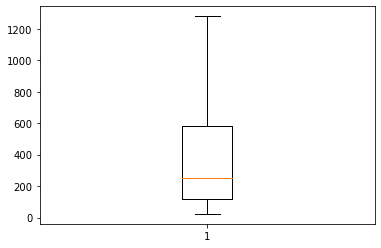

In [150]:
plt.boxplot(heart.creatinine_phosphokinase) #cont

<AxesSubplot:xlabel='anaemia', ylabel='count'>

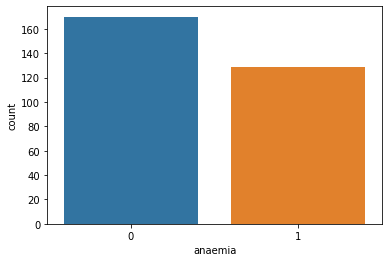

In [151]:
sns.countplot(x='anaemia',data=heart)#dis

<AxesSubplot:xlabel='diabetes', ylabel='count'>

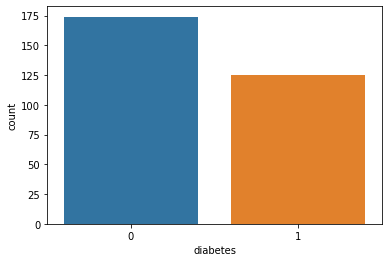

In [152]:
sns.countplot(x='diabetes',data=heart)#dis

{'whiskers': [<matplotlib.lines.Line2D at 0x2a24bd05640>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24bd05d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24bd052b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24bd124c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24bd12850>],
 'means': []}

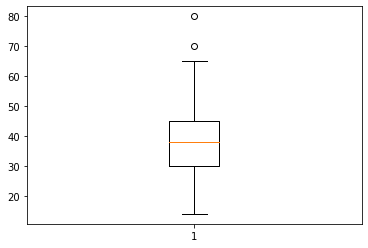

In [153]:
plt.boxplot(heart.ejection_fraction)#cont

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

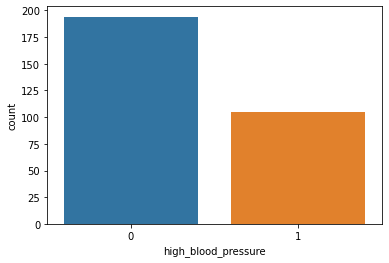

In [154]:
sns.countplot(x='high_blood_pressure',data=heart)#dis

{'whiskers': [<matplotlib.lines.Line2D at 0x2a24bdca9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24bdd6100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24bdca610>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24bdd6820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24bdd6bb0>],
 'means': []}

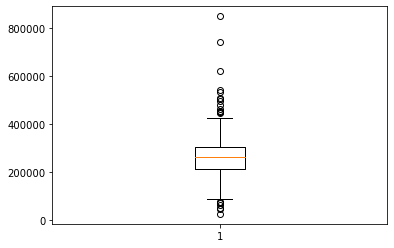

In [155]:
plt.boxplot(heart.platelets)#cont

In [156]:
q3 = heart.platelets.quantile(0.75)#removing outlier
q1 = heart.platelets.quantile(0.25)
iqr = q3-q1
iqr

91000.0

In [157]:
ue = q3+1.5*(iqr)
print(ue)

440000.0


In [158]:
le = q1-1.5*(iqr)
print(le)

76000.0


In [159]:
heart[(heart.platelets<ue)&(heart.platelets>le)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,1280.25,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146.00,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111.00,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160.00,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103.00,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,61.00,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1280.25,0,38,0,270000.00,1.2,139,0,0,271,0
297,45.0,0,1280.25,0,38,0,140000.00,1.4,140,1,1,280,0


In [160]:
heart.platelets[heart.platelets>ue]=ue
heart.platelets[heart.platelets<le]=le

C:\Users\Dell\AppData\Local\Temp/ipykernel_20040/1569433459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart.platelets[heart.platelets>ue]=ue
C:\Users\Dell\AppData\Local\Temp/ipykernel_20040/1569433459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart.platelets[heart.platelets<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x2a24be29df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24be3a490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24be29ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24be3abb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24be3af40>],
 'means': []}

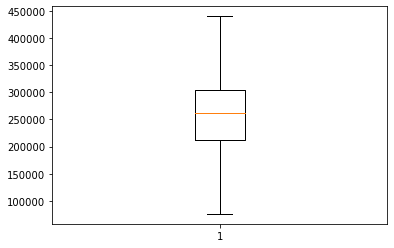

In [161]:
plt.boxplot(heart.platelets)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a24be9d880>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24be9df40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24be9d4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24beaa5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24beaa970>],
 'means': []}

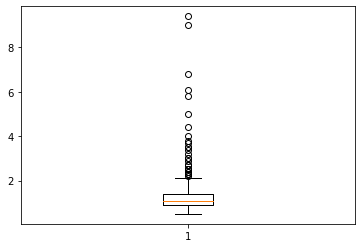

In [162]:
plt.boxplot(heart.serum_creatinine)

In [163]:
q3 = heart.serum_creatinine.quantile(0.75)#removing outlier
q1 = heart.serum_creatinine.quantile(0.25)
iqr = q3-q1
iqr

0.4999999999999999

In [164]:
ue = q3+1.5*(iqr)
print(ue)

2.1499999999999995


In [165]:
le = q1-1.5*(iqr)
print(le)

0.15000000000000024


In [166]:
heart[(heart.serum_creatinine<ue)&(heart.serum_creatinine>le)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,1280.25,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146.00,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111.00,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47.00,0,40,1,204000.00,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1280.25,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,1280.25,1,60,0,440000.00,0.8,138,0,0,278,0
297,45.0,0,1280.25,0,38,0,140000.00,1.4,140,1,1,280,0


In [167]:
heart.serum_creatinine[heart.serum_creatinine>ue]=ue
heart.serum_creatinine[heart.serum_creatinine<le]=le

C:\Users\Dell\AppData\Local\Temp/ipykernel_20040/2819990271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart.serum_creatinine[heart.serum_creatinine>ue]=ue
C:\Users\Dell\AppData\Local\Temp/ipykernel_20040/2819990271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart.serum_creatinine[heart.serum_creatinine<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x2a24bee9f40>,
 'caps': [<matplotlib.lines.Line2D at 0x2a24bef5580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a24bee9bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a24bef5ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a24beff070>],
 'means': []}

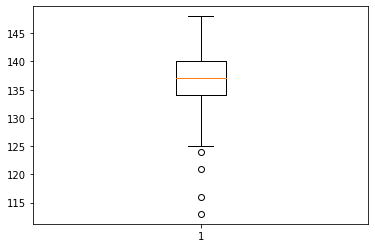

In [168]:
plt.boxplot(heart.serum_sodium )

<AxesSubplot:xlabel='sex', ylabel='count'>

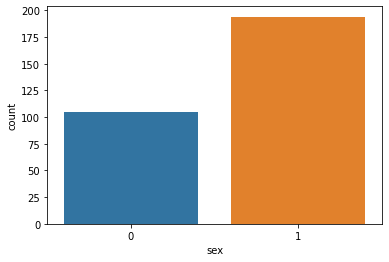

In [169]:
sns.countplot(x='sex',data=heart)

<AxesSubplot:xlabel='smoking', ylabel='count'>

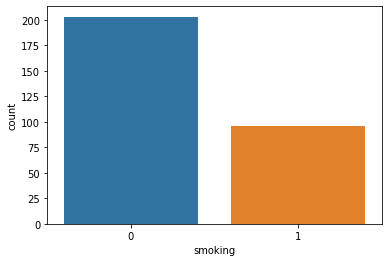

In [170]:
sns.countplot(x='smoking',data=heart)

In [171]:
heart.drop(["time","anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)#drop

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,75.0,582.00,20,265000.00,1.90,130,1
1,55.0,1280.25,38,263358.03,1.10,136,1
2,65.0,146.00,20,162000.00,1.30,129,1
3,50.0,111.00,20,210000.00,1.90,137,1
4,65.0,160.00,20,327000.00,2.15,116,1
...,...,...,...,...,...,...,...
294,62.0,61.00,38,155000.00,1.10,143,0
295,55.0,1280.25,38,270000.00,1.20,139,0
296,45.0,1280.25,60,440000.00,0.80,138,0
297,45.0,1280.25,38,140000.00,1.40,140,0


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

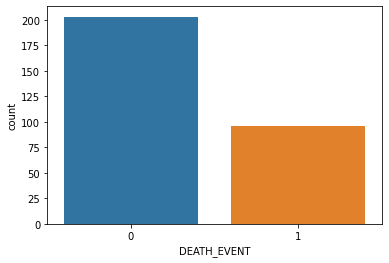

In [172]:
sns.countplot(x='DEATH_EVENT',data=heart)

In [175]:
#Splitting the Features and Target
y = heart.DEATH_EVENT #x and y define
x = heart.drop(["time","anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)


In [176]:
#Splitting the Data into Training data & Test Data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2,train_size = 0.8,random_state=10)

In [177]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [183]:
model=LogisticRegression()

In [184]:
#Training the LogisticRegression model with Training data
model.fit(train_x,train_y)

LogisticRegression()

In [185]:
model.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [188]:
#Accuracy Score
model.score(test_x,test_y)

0.65

In [189]:
model.intercept_

array([-1.24477655e-11])

In [190]:
probability=model.predict_proba(test_x)[:,1]
probability

array([0.3667968 , 0.35575602, 0.24183891, 0.2791998 , 0.44673016,
       0.34296267, 0.32050958, 0.34043164, 0.31018079, 0.4020746 ,
       0.29767821, 0.22472984, 0.26526254, 0.34997228, 0.37996506,
       0.33916889, 0.4467297 , 0.39532856, 0.2501899 , 0.22472909,
       0.32274497, 0.33476746, 0.34677849, 0.35318135, 0.31989627,
       0.34805478, 0.35061385, 0.30003729, 0.32977202, 0.3186733 ,
       0.3576946 , 0.39802255, 0.44672992, 0.32274558, 0.31623446,
       0.28375293, 0.36093409, 0.29709081, 0.31806189, 0.3398    ,
       0.36028521, 0.34614174, 0.34805513, 0.35189604, 0.34486896,
       0.27976647, 0.41226494, 0.26198462, 0.33916865, 0.33351511,
       0.32274556, 0.4467297 , 0.32274489, 0.26198463, 0.31623442,
       0.34614055, 0.44672893, 0.43909132, 0.34486773, 0.39398419])